In [1]:
import pandas as pd
import numpy as np
import datetime
import nltk
from nltk import word_tokenize, regexp_tokenize
from nltk.util import ngrams
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt
from itertools import chain

In [2]:
data = pd.read_pickle('CLEAN_DATA_STEM_BISMILLAH_081018.pkl')

In [16]:
data.head()

id source             pubdate clean_category         subcategory  \
0   1   seva 2018-07-26 09:57:15       properti  tips-n-rekomendasi   
1   2   seva 2018-07-18 08:31:17       properti  tips-n-rekomendasi   
2   3   seva 2018-07-17 11:42:13       properti  tips-n-rekomendasi   
3   4   seva 2018-07-11 09:55:45       properti  tips-n-rekomendasi   
4   5   seva 2018-03-07 11:23:54       properti  tips-n-rekomendasi   

                                            content2  word_count_after_prep2  \
0  beli huni tinggal butuh jangka pasang muda bin...                     216   
1  beli rumah beli kacang goreng dengar nyata har...                     312   
2  properti salah aset untung kota kota beli prop...                     329   
3  milik rumah lapang idam damba orang lapang rum...                     309   
4  investasi salah hidup orang jenis investasijug...                     222   

                                           tokenized  
0  [beli, huni, tinggal, butuh, jangka, pasang, m...  
1  [beli, rumah, beli, kacang, goreng, dengar, ny...  
2  [properti, salah, aset, untung, kota, kota, be...  
3  [milik, rumah, lapang, idam, damba, orang, lap...  
4  [investasi, salah, hidup, orang, jenis, invest...

In [4]:
data.drop(data[data['id'] == 119970].index, inplace=True)
data.drop(data[data['id'] == 169337].index, inplace=True)
data.drop(data[data['id'] == 171108].index, inplace=True)
data.drop(data[data['id'] == 236771].index, inplace=True)
data.drop(data[data['id'] == 342711].index, inplace=True)

In [25]:
oto_len = sum(data[(data.clean_category == 'otomotif') & (data.source == 'seva')].word_count_after_prep2)
pro_len = sum(data[(data.clean_category == 'properti') & (data.source == 'seva')].word_count_after_prep2)
print(oto_len + pro_len)
print(oto_len)
print(pro_len)

115209
113129
2080


In [27]:
oto_len = data[(data.clean_category == 'otomotif') & (data.source == 'seva')].shape[0]
pro_len = data[(data.clean_category == 'properti') & (data.source == 'seva')].shape[0]
print(oto_len + pro_len)
print(oto_len)
print(pro_len)

367
359
8


In [29]:
oto_len = sum(data[(data.clean_category == 'otomotif') & (data.source != 'seva')].word_count_after_prep2)
pro_len = sum(data[(data.clean_category == 'properti') & (data.source != 'seva')].word_count_after_prep2)
print(oto_len + pro_len)
print(oto_len)
print(pro_len)

17852384
14912640
2939744


In [28]:
oto_len = data[(data.clean_category == 'otomotif') & (data.source != 'seva')].shape[0]
pro_len = data[(data.clean_category == 'properti') & (data.source != 'seva')].shape[0]
print(oto_len + pro_len)
print(oto_len)
print(pro_len)

114237
97850
16387


In [30]:
359 - 268

91

In [ ]:
oto_len = data[data.clean_category == 'otomotif'].shape[0]
pro_len = data[data.clean_category == 'properti'].shape[0]
print(oto_len + pro_len)
print(oto_len)
print(pro_len)

In [8]:
def translate_category(x):
	"""
	Function for otomotif and property category mapping
	"""
	x[0] = str(x[0])
	x[1] = str(x[1])
	x[2] = str(x[2])

	if ('seva' in x[2].lower()) and ('properti' not in x[0].lower()):
		return 'otomotif'
	elif x[0].lower() in ["oto", "otomotif", "mobil", "modifikasi"]:
		return 'otomotif'
	elif (x[0].lower() in ["autotekno"]) and (x[1].lower() in ['mobil', 'motor', 'advertorial autotekno', 'komunitas', 'modifikasi', 'rest area', 'test', 'tips & trik']):
		return 'otomotif'
	elif (x[0].lower() in ["home"]) and (x[1].lower() in ['otomotif']):
		return 'otomotif'
	elif (x[0].lower() in ["home"]) and (x[1].lower() in ['properti']):
		return 'properti'
	elif (x[0].lower() in ['bisnis', 'properti', 'finance', 'ekbis', 'ekonomi', 'economy']) and ('properti' in x[1].lower()):
		return 'properti'
	else:
		return x[0].lower()

In [6]:
sum(data.word_count_after_prep2)

59561456

In [11]:
data['clean_category'] = data[['clean_category', 'subcategory', 'source']].apply(translate_category, axis=1)

In [8]:
non = data[data.source != 'seva']

In [15]:
data.shape

(350072, 8)

In [14]:
data = data[~data.id.isin([56445, 100932])]

In [4]:
data['word_count_after_prep2'] = data['tokenized'].apply(lambda x: len(x))

In [16]:
sum(data.word_count_after_prep2.tolist())

59600647

In [17]:
data.to_pickle('CLEAN_DATA_STEM_BISMILLAH_081018.pkl')

In [18]:
data['tokenized'] = data['tokenized'].apply(lambda x: [y for y in x if y != '']) x

In [2]:
data = pd.read_pickle('CLEAN_DATA_BISMILLAH.pkl')

In [3]:
data = data.content
data = data.tolist()
pattern = r'\w+'

In [4]:
data = [list(map(' '.join, ngrams(regexp_tokenize(x.lower(), pattern), 3))) for x in data]

In [5]:
data = list(chain.from_iterable(data))

In [6]:
freq_uni = nltk.FreqDist(ch for ch in data)
# take 50 commons ngram 
freq_commons_uni = freq_uni.most_common(50)
tup_uni = tuple(freq_commons_uni)
dict_uni_all = dict((x, y) for x, y in tup_uni)

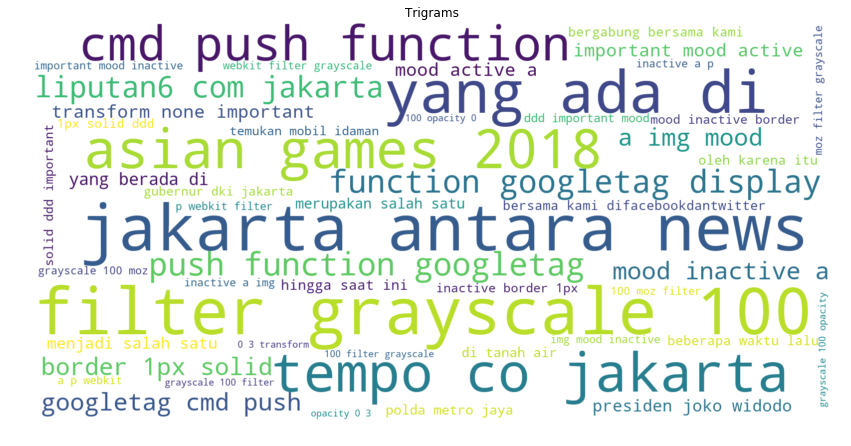

In [7]:
cloud_uni = wordcloud.WordCloud(background_color='white',width=1600, height=800)
cloud_uni.generate_from_frequencies(dict_uni_all)
plt.figure(figsize=(20,6))
plt.title('Trigrams')
plt.imshow(cloud_uni, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [2]:
ngram = pd.read_pickle('trigrams.pkl')

# Trigrams All

In [3]:
ngram = ngram[ngram.trigrams_str.notnull()]

In [ ]:
#gabung
all_trigram = ngram.trigrams_str.str.cat(sep=', ')

In [ ]:
all_trigram_token = all_trigram.split(',')

In [ ]:
freq = nltk.FreqDist(ch for ch in all_trigram_token)

In [ ]:
# take 50 commons ngram 
freq_commons = freq.most_common(50)

In [ ]:
cloud = wordcloud.WordCloud(background_color='white')

In [ ]:
tup = tuple(freq_commons)
dict_tri_all = dict((x, y) for x, y in tup)

In [ ]:
plt.figure(figsize=(20,6))
cloud.generate_from_frequencies(dict_tri_all)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Category Generalization

In [4]:
def translate_category(x):
    x[0] = str(x[0])
    x[1] = str(x[1])
    x[2] = str(x[2])
    if x[0].lower() in ['dendy raditya atmosuwito', 'dharendra wardhana', 'wahyudi akmaliah', 
                         'aris santoso', "ahmad jilul qur'ani farid", 'satya adhi', 'andi achdian', 'bagus takwin', 
                         'mohamad mova alafghani', 'ahmad ilham danial', 'muhammad yuanda zara', 'sherr rinn', 'wawancara']:
        return 'opini'
    elif (x[0].lower() == 'kolom') and (x[1].lower() in ['opini', 'pendapat']):
        return 'opini'
    elif 'pendidikan' in x[0].lower():
        return 'pendidikan'
    elif x[1].lower() in ['news']:
        return 'berita'
    elif x[0].lower() in ["nasional", "publik", "metro", "news", "haji", 
                           "fokus", "dunia", "hukum", "pilkada", "regional", 
                           "internasional", "daerah", "dunia", "hard news", 
                           "international", "berita", "humaniora", 
                           "indepth", "fokus", "politik", "sosial budaya", "metropolitan"]:
        return 'berita'
    elif (x[0].lower() == 'kolom') and (x[1].lower() in ['tajuk']):
        return 'berita'
    elif 'properti' in x[1].lower():
        return 'properti'
    elif 'properti' in x[0].lower():
        return 'properti'
    elif 'kuliner' in x[1].lower():
        return 'makanan'
    elif 'food' in x[0].lower():
        return 'makanan'
    elif ('health' in x[0].lower()) or ('kesehatan' in x[0].lower()):
        return 'makanan'
    elif ('health' in x[1].lower()) or ('kesehatan' in x[1].lower()):
        return 'makanan'
    elif 'film' in x[1].lower():
        return 'hiburan'
    elif x[1].lower() in ["hot", "travel", "celebrity", "seleb", "showbiz", "entertainment", 
                                   "film", "hobi", "musik", "hiburan"]:
        return 'hiburan'
    elif x[0].lower() in ["hot", "travel", "celebrity", "seleb", "showbiz", "entertainment", 
                                   "film", "hobi", "musik", "hiburan"]:
        return 'hiburan'
    elif x[1].lower() in ["inet", "techno", "teknologi", "digital", "autotekno", "inet", "tekno"]:
        return 'teknologi'
    elif x[0].lower() in ["inet", "techno", "teknologi", "digital", "autotekno", "inet", "tekno"]:
        return 'teknologi'
    elif x[1].lower() in ["keuangan", "finance", "economy", "bisnis", "ekbis", "marketing", "ekonomi"]:
        return 'ekonomi'
    elif x[0].lower() in ["keuangan", "finance", "economy", "bisnis", "ekbis", "marketing", "ekonomi"]:
        return 'ekonomi'
    elif x[1].lower() in ["sport", "bola", "asiangames", "pialadunia", "superskors", 
                                   "pialadunia", "soccer", "sports", "superskor", "olahraga"]:
        return 'olahraga'
    elif x[0].lower() in ["sport", "bola", "asiangames", "pialadunia", "superskors", 
                                   "pialadunia", "soccer", "sports", "superskor", "olahraga"]:
        return 'olahraga'
    elif x[2].lower() == 'seva':
        return 'otomotif'
    elif x[1].lower() in ["oto", "otomotif", "mobil", "sumber informasi", "modifikasi", "produk"]:
        return 'otomotif'
    elif x[0].lower() in ["oto", "otomotif", "mobil", "sumber informasi", "modifikasi", "produk"]:
        return 'otomotif'
    elif x[1].lower() in ["lifestyle", "cantik", "gaya hidup", "gaya", "travel", "fashion & beauty"]:
        return 'gaya hidup'
    elif x[0].lower() in ["lifestyle", "cantik", "gaya hidup", "gaya", "travel", "fashion & beauty"]:
        return 'gaya hidup'
    elif x[1].lower() == 'keluarga':
        return 'gaya hidup'
    elif (x[0].lower() == 'tribunners') and (x[1].lower() in ['umum', 'catatan pinggiran']):
        return 'lain-lain'
    elif x[0].lower() in ['mild report', 'australia-plus', ' ', '', 'nan', 'none']:
        return 'lain-lain'
    elif x[0].lower() in ['event', 'current issue']:
        return 'event'
    elif x[1].lower() in ['catatan pinggir', 'cari angin', 'jeda', ]:
        return 'lain-lain'

In [4]:
def translate_category2(x):
    x[0] = str(x[0])
    x[1] = str(x[1])
    x[2] = str(x[2])
    
    if ('seva' in x[2].lower()) and ('properti' not in x[0].lower()):
        return 'otomotif'
    elif x[0].lower() in ["oto", "otomotif"]:
        return 'otomotif'
    elif (x[0].lower() in ["autotekno"]) and (x[1].lower() in ['mobil', 'motor']):
        return 'otomotif'
    elif (x[0].lower() in ['Bisnis', 'Properti', 'finance', 'Ekbis', 'Home']) and ('properti' in x[1].lower()):
        return 'properti'
    else:
        return x[0].lower()

In [5]:
ngram['clean_category'] = ngram[['category', 'subcategory', 'source']].apply(translate_category2, axis=1)

In [ ]:
ngram[ngram['clean_category'].isnull()]['category'].unique()

In [ ]:
ngram[ngram['clean_category'].isnull()]['subcategory'].unique()

In [ ]:
ngram['clean_category'].unique()

# Per Hour

### Labeling Jam

In [6]:
ngram.loc[ngram.pubdate == '0001-02-16 00:00:00', ['pubdate']] = '2018-02-16 00:00:00'

In [7]:
ngram.loc[ngram.pubdate == '0001-01-06 00:00:00', ['pubdate']] = '2018-01-16 00:00:00'

In [8]:
ngram['pubdate'] = pd.to_datetime(ngram['pubdate'], format='%Y-%m-%d %H:%M:%S')

In [9]:
ngram['time'] = ngram['pubdate'].dt.time

In [ ]:
ngram[ngram.post_id == 974]

In [ ]:
ngram.dtypes

In [10]:
def class_time(time):
    if (time >= datetime.time(hour=0)) and (time <= datetime.time(hour=5)):
        return 'dini hari'
    elif (time > datetime.time(hour=5)) and (time <= datetime.time(hour=12)):
        return 'pagi hari'
    elif (time > datetime.time(hour=12)) and (time <= datetime.time(hour=18)):
        return 'sore hari'
    elif (time > datetime.time(hour=18)) and (time <= datetime.time(hour=23, minute=59, second=59)):
        return 'malam hari'
    else:
        return 'undefined'

In [11]:
ngram['class_time'] = ngram['time'].apply(lambda x : class_time(x))

## Grouping tokens per hour

In [ ]:
# ngram['tokenized_text_str'] = ngram['tokenized_text_str'].apply(lambda x: x.split(','))

In [6]:
ngram = ngram[ngram.bigrams_str.notnull()]

AttributeError: 'DataFrame' object has no attribute 'bigrams_str'

In [ ]:
#ngrams_df = ngram.groupby('class_time').agg({'bigrams_str': lambda x: ','.join(x)})

In [ ]:
ngrams_df['tokenized_text_str'] = ngrams_df['tokenized_text_str'].apply(lambda x: x.split(','))

In [ ]:
ngrams_df['freq'] = ngrams_df['tokenized_text_str'].apply(lambda x: nltk.FreqDist(ch for ch in x))

In [ ]:
# take 50 commons ngram 
ngrams_df['freq_commons_50'] = ngrams_df['freq'].apply(lambda x: x.most_common(50))

In [ ]:
ngrams_df.head()

## Visualisasi Word Cloud

In [9]:
import wordcloud
import matplotlib.pyplot as plt

In [ ]:
cloud = wordcloud.WordCloud()

In [ ]:
tup_50 = tuple(ngrams_df.loc['dini hari']['freq_commons_50'])

In [ ]:
dict_uni = dict((x, y) for x, y in tup_50)

In [ ]:
plt.figure(figsize=(20,6))
cloud.generate_from_frequencies(dict_uni)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("foo.png")
plt.show()

In [ ]:
tes = "sezar"
if 'se' in tes:
    print('ok')

# Grouping per Category

In [7]:
def create_wc(index, row):
    cloud = wordcloud.WordCloud(background_color='white',width=1600, height=800)
    tup_50 = tuple(row['freq_commons_50'])
    dict_uni = dict((x, y) for x, y in tup_50)
    cloud.generate_from_frequencies(dict_uni)
    plt.figure(figsize=(20,6))
    plt.title(index)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [8]:
ngrams_cat = ngram[ngram.clean_category.isin(['properti', 'otomotif'])].groupby(['clean_category']).agg({'trigrams_str': lambda x: ','.join(x)})

In [9]:
# ngrams_cat_5 = ngrams_cat.loc[['berita', 'ekonomi','properti','otomotif', 'olahraga'], :]
ngrams_cat_5  = ngrams_cat.loc[['properti','otomotif'], :]

In [10]:
ngrams_cat_5['trigrams_token'] = ngrams_cat_5['trigrams_str'].apply(lambda x: x.split(','))

In [11]:
ngrams_cat_5['freq'] = ngrams_cat_5['trigrams_token'].apply(lambda x: nltk.FreqDist(ch for ch in x))

In [12]:
ngrams_cat_5['freq_commons_50'] = ngrams_cat_5['freq'].apply(lambda x: x.most_common(50))

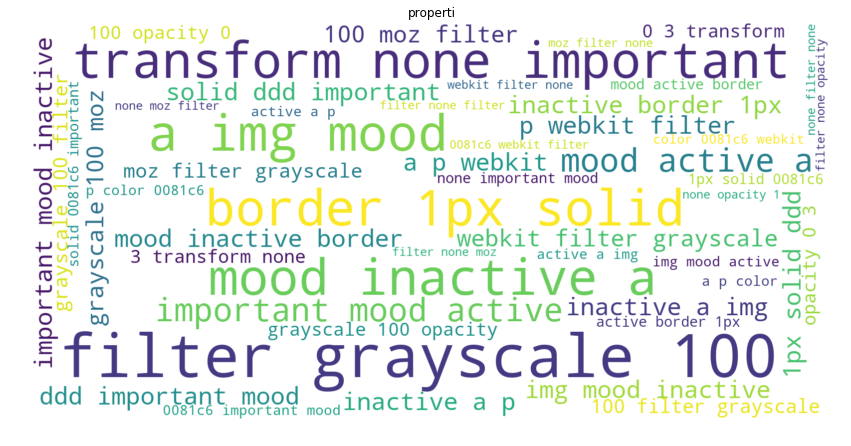

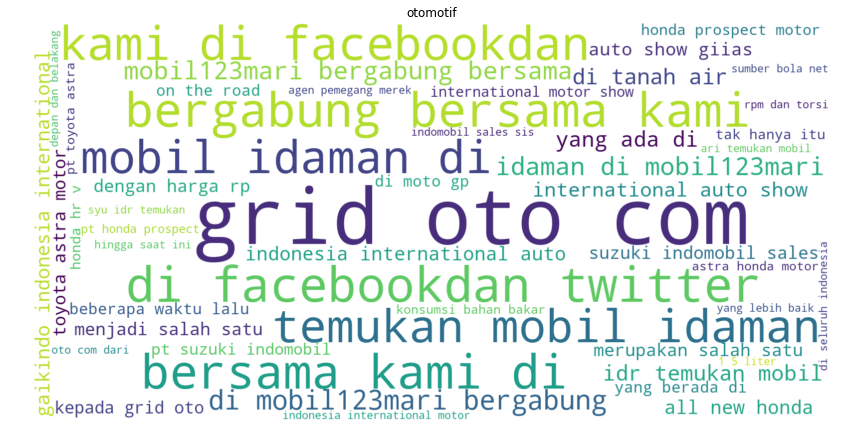

In [13]:
for index, row in ngrams_cat_5.iterrows():
    create_wc(index,row)